# Lab. 5: Iterated local Search and Simulated Annealing

## Introduction

#### <u>The goal of this lab is to compare the behavior of Iterated Local search (ILS) and Simulated Annealing on the knapsack 0/1 problem</u>

You'll have to implement five methods:

- *Iterated Local Search*:
  - perturbation(x, k). Try different implementation of the perturbation methods. (similar to the shake method in the previous lab)
  - local_search(f, x). Try different local search strategies (FirstImprovement or BestImprovement)
- *Simulated Annealing*:
  - random_neighbor(x, i). Select a random neighbor for the solution x by doing only a few changes
  - acceptance(x, eval_x, xp, eval_xp, T). Return the accepted solution (x or xp) and corresponding fitness.
  - update_temperature(T, alpha). Proceed with the update of the temperature parameter.
---

Getting started: The following cells contain the implementation of the methods that we will use throughout this lab, together with utilities.

#### **The Knapsack 0/1 problem** is a combinatorial problem that works as follows.

We have a bag with limited capacity L, and we have a set of items  $I=\{i_1,...,i_N\}$  Each  $i_j$  has a given volume $w_{ij}$ and a value $v_{ij}$. The goal of the optimization problem is to fill the bag with a combination of items $S$ such that the combination maximizes the total value contained by the bag while complaining with the constraint on the capacity.

In this version of the knapsack problem we can either discard or carry (at most 1) item. Thus, the search space is $\{0,1\}^{|I|}$ .

Since this is a maximization problem, we can turn it into a minimization problem by returning the opposite of the value. If a solution is not feasible (i.e., exceeds the maximum volume) the function will return a score of 0 (like an empty bag).


Assume
$$ N = \text{number of items} $$
$$ X = \{x_1, x_2, \dots, x_N\} = \text{set of items} $$
$$ v_i = \text{value of item } x_i $$
$$ w_i = \text{weight of item } x_i $$
$$ W = \text{maximum weight the knapsack can hold} $$


Then the 0/1 knapsack problem can be formulated as follows:

\begin{equation*}
  \begin{array}{lr@{}c@{}r@{}l}
    \text{maximize }   &S = \sum_{x_i \in X} v_i x_i \\
    \text{subject to } & \sum_{x_i \in X} w_i x_i \leq W \\
                       & x_i \in \{0, 1\} \forall x_i \in X \\
  \end{array}
\end{equation*}

\\

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Knapsack_0_1:

    def __init__(self):
        self._items = [
            {'name': 'apple', 'value': 1, 'volume': 2},
            {'name': 'pear', 'value': 2, 'volume': 2},
            {'name': 'banana', 'value': 2, 'volume': 2},
            {'name': 'watermelon', 'value': 5, 'volume': 10},
            {'name': 'orange', 'value': 3, 'volume': 2},
            {'name': 'avocado', 'value': 3, 'volume': 2},
            {'name': 'blueberry', 'value': 3, 'volume': 1},
            {'name': 'coconut', 'value': 4, 'volume': 3},
            {'name': 'cherry', 'value': 2, 'volume': 1},
            {'name': 'apricot', 'value': 1, 'volume': 1},
        ]
        self._BAG_CAPACITY = 10
        self.history = []
        self.values = []

    def _get_value(self, solution):
        cur_cap = self._BAG_CAPACITY
        cur_val = 0
        for i, v in enumerate(solution):
            if v == 1:
                cur_val += self._items[i]['value']
                cur_cap -= self._items[i]['volume']
            if cur_cap < 0:
                return 0
        return -cur_val

    def __call__(self, solution):
        value = self._get_value(solution)
        self.history.append(solution)
        self.values.append(value)
        return value

    def trend(self):
        plt.figure()
        plt.plot(self.values)
        plt.show()

## Exercises

### Iterated Local Search
**Finish the implementation of the algorithm first**, then answer the question later on.

In [8]:
import copy
import random

def iteratedLocalSearch(f, x0, ls_max):
    """
    Seeks for the minimum of the function by means of the Iterated local search algorithm.

    - f: the function to optimize
    - x0: the initial point
    - ls_max: the max number of local search
    """

    def perturbation(x, k):
        """
        Implements the perturbation step for the ILS algorithm.

        - x: starting point
        - k: number of changes to be made

        Returns:
        - x': the random sampled from the neighborhood
        """
        xp = copy.deepcopy(x)
        for i in range(k):
            index = random.randint(0, len(x) - 1)
            if xp[index] == 0:
                xp[index] = 1
            else:
                xp[index] = 0
        # To be implemented

    #assert False, "Perturbation step has to be implemented"
        return xp

    def acceptance_criterion(f, x, xs, k):
        if f(xs) < f(x):
            x = xs
            k = 1
        else:
            k += 1
        return x, k

    def local_search(f, x, method):
        """
        Implements the local search step (e.g.: BestImprovement) for the ILS algorithm.

        - f: function to optimize
        - x: starting point

        Returns:
        - x': local optimum
        """
        # To be implemented
        #assert False, "Local Search step has to be implemented"

        xp = copy.deepcopy(x)
        if method == 'BestImprovment':
            for i in range(len(xp)):
                if xp[i] == 1:
                    xp[i] = 0
                else:
                    xp[i] = 1
                if f(xp) > f(x):
                    x = xp
        elif method == 'FirstImprovment':
            for i in range(len(xp)):
                if xp[i] == 1:
                    xp[i] = 0
                else:
                    xp[i] = 1
                if f(xp) > f(x):
                    x = xp
                    break
        return xp

    n = 0
    x = np.array(x0, int)
    best = x
    bestval = f(x)

    i = 0
    while i < ls_max:
        xp = perturbation(x, i)
        xs = local_search(f, xp, method='BestImprovment')
        x, i = acceptance_criterion(f, x, xs, i)

        # Store the best
        curval = f(x)
        if curval < bestval:
            bestval = curval
            best = x
    return best

#### Questions:
- how does the starting point influence the search process?
- how does the ls_max parameter affect the quality of the result?
- how does the perturbation of the solutions affect:
    - quality of the search?
    - velocity of the search?


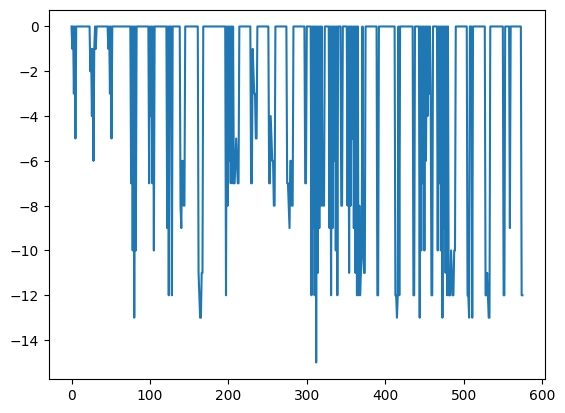

In [9]:
func = Knapsack_0_1()
iteratedLocalSearch(func, [0] * len(func._items), 10)
func.trend()

### Simulated Annealing
**Finish the implementation of the algorithm first**, then answer the question later on.

In [39]:
import math 
def simulatedAnnealing(f, x0, iter, T, k, alpha):
    """
    Seeks for the minimum of the function by means of the Simulated Annealing algorithm.

    - f: the function to optimize
    - x0: the initial point
    - iter: number of temperature update
    - T: Initial high temperature
    - k: Number of iterations at fixed temperature
    - alpha: cooling scheduling parameter
    """

    def random_neighbor(x, i):
        """
        Generates a random neighbor for the solution x.

        - x: starting point
        - i: number of changes to be made

        Returns:
        - x': the random sampled from the neighborhood
        """
        # To be implemented
        #assert False, "Random Neighbor generator has to be implemented"
        xp = copy.deepcopy(x)
        for i in range(k):
            index = random.randint(0, len(x) - 1)
            if xp[index] == 0:
                xp[index] = 1
            else:
                xp[index] = 0
        return xp

    def acceptance(x, eval_x, xp, eval_xp, T):
        """
        Returns the solution and fitness accepted between x and xp.

        - x: current solution
        - eval_x: eval of solution x
        - xp: new solution
        - eval_xp: eval of solution xp
        - T: temperature

        Returns:
        - x: new current solution
        - eval_x: eval of new solution x
        """
        # To be implemented
        #assert False, "Acceptance function has to be implemented"
        if eval_xp < eval_x:
            x = xp
            eval_x = eval_xp
        else:
            soglia = math.exp(-(eval_xp - eval_x)/T)
            print(f'T = {T}\t eval_x = {eval_x}, \t eval_xp = {eval_xp}')
            
            prob = random.uniform(0, 1)
            print(f'soglia = {soglia} \t numero casuale = {prob}')
            if soglia > prob:
                x = xp
                eval_x = eval_xp
            else:
                pass
        return x, eval_x

    def update_temperature(T, alpha):
        """
        Updates the temperature T.

        - T: temperature
        - alpha: cooling scheduling parameter

        Returns:
        - T: updated temperature
        """
        # To be implemented
        T = alpha*T
        #assert False, "Temperature update function has to be implemented"
        return T

    x = np.array(x0)
    for i in range(iter):
        print(f'ITERAZIONE: {i} \t starting point: {x}')
        for fix_temp in range(k):
            eval_x = f(x)
            xp = random_neighbor(x, fix_temp)
            eval_xp = f(xp)
            print(f'random_neighbour = {xp} \t valore = {eval_xp}')
            x, eval_x = acceptance(x, eval_x, xp, eval_xp, T)
        T = update_temperature(T, alpha)

    return x, eval_x

#### Questions:
- how does the starting point influence the search process?
- how does the initial temperature affect the quality of the result?
- how does the selection of the neighborhood affect:
    - quality of the search?
    - velocity of the search?
- How does the acceptance policy influence the search?
- How does the update of the temparture affect the search?


ITERAZIONE: 0 	 starting point: [0 0 0 0 0 0 0 0 0 0]
random_neighbour = [0 1 0 0 0 0 0 0 0 1] 	 valore = -3
random_neighbour = [0 1 1 0 0 0 0 0 1 1] 	 valore = -7
ITERAZIONE: 1 	 starting point: [0 1 1 0 0 0 0 0 1 1]
random_neighbour = [1 1 1 0 0 0 0 0 1 0] 	 valore = -7
T = 0.5	 eval_x = -7, 	 eval_xp = -7
soglia = 1.0 	 numero casuale = 0.9733959169130211
random_neighbour = [1 1 1 1 0 0 1 0 1 0] 	 valore = 0
T = 0.5	 eval_x = -7, 	 eval_xp = 0
soglia = 8.315287191035679e-07 	 numero casuale = 0.7718431905566603
ITERAZIONE: 2 	 starting point: [1 1 1 0 0 0 0 0 1 0]
random_neighbour = [1 1 1 0 0 0 0 0 1 0] 	 valore = -7
T = 0.25	 eval_x = -7, 	 eval_xp = -7
soglia = 1.0 	 numero casuale = 0.5259647428326946
random_neighbour = [0 1 1 0 1 0 0 0 1 0] 	 valore = -9
ITERAZIONE: 3 	 starting point: [0 1 1 0 1 0 0 0 1 0]
random_neighbour = [0 1 1 0 1 1 0 1 1 0] 	 valore = 0
T = 0.125	 eval_x = -9, 	 eval_xp = 0
soglia = 5.380186160021138e-32 	 numero casuale = 0.5471223980224247
random_neigh

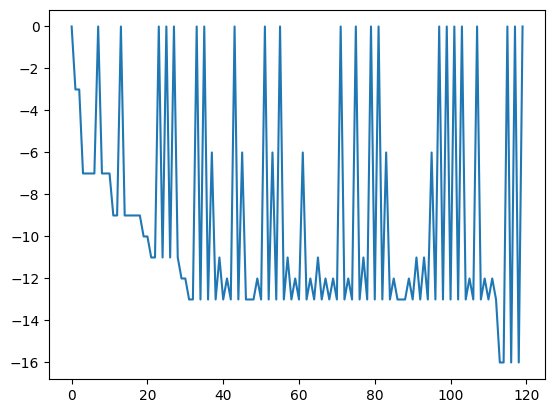

ITERAZIONE: 0 	 starting point: [0 0 0 0 0 0 0 0 0 0]
random_neighbour = [1 0 0 0 1 0 0 0 0 0] 	 valore = -4
random_neighbour = [0 0 0 0 0 0 0 0 0 0] 	 valore = 0
T = 5	 eval_x = -4, 	 eval_xp = 0
soglia = 0.44932896411722156 	 numero casuale = 0.3518361180793773
ITERAZIONE: 1 	 starting point: [0 0 0 0 0 0 0 0 0 0]
random_neighbour = [0 0 0 1 0 0 0 0 0 1] 	 valore = 0
T = 2.5	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.8441970009476791
random_neighbour = [0 0 1 1 0 1 0 0 0 1] 	 valore = 0
T = 2.5	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.25442882928961763
ITERAZIONE: 2 	 starting point: [0 0 1 1 0 1 0 0 0 1]
random_neighbour = [0 0 0 1 1 1 0 0 0 1] 	 valore = 0
T = 1.25	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.6353781420676368
random_neighbour = [0 0 0 0 1 1 1 0 0 1] 	 valore = -10
ITERAZIONE: 3 	 starting point: [0 0 0 0 1 1 1 0 0 1]
random_neighbour = [1 0 0 0 1 1 1 0 1 1] 	 valore = -13
random_neighbour = [0 1 0 0 1 1 1 0 1 1]

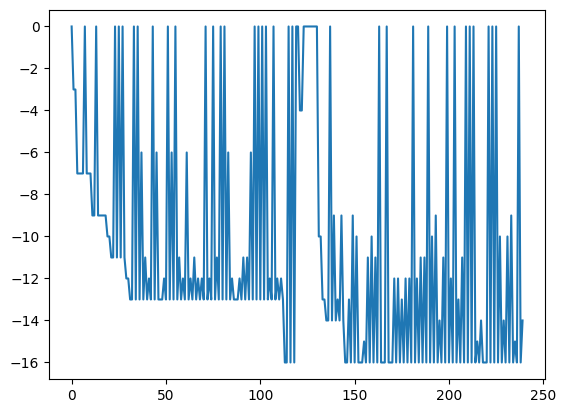

ITERAZIONE: 0 	 starting point: [0 0 0 0 0 0 0 0 0 0]
random_neighbour = [0 0 0 1 0 0 0 0 1 0] 	 valore = 0
T = 10	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.7946640386739265
random_neighbour = [0 1 0 1 0 0 0 0 1 1] 	 valore = 0
T = 10	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.09395037642846105
ITERAZIONE: 1 	 starting point: [0 1 0 1 0 0 0 0 1 1]
random_neighbour = [0 1 0 1 0 0 0 0 1 1] 	 valore = 0
T = 5.0	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.6400836063111309
random_neighbour = [0 1 0 1 1 0 0 1 1 1] 	 valore = 0
T = 5.0	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.8342780931441296
ITERAZIONE: 2 	 starting point: [0 1 0 1 1 0 0 1 1 1]
random_neighbour = [0 0 0 1 1 0 0 1 1 0] 	 valore = 0
T = 2.5	 eval_x = 0, 	 eval_xp = 0
soglia = 1.0 	 numero casuale = 0.2775773676415586
random_neighbour = [0 0 0 0 1 0 0 0 1 0] 	 valore = -5
ITERAZIONE: 3 	 starting point: [0 0 0 0 1 0 0 0 1 0]
random_neighbour = [0 0 0 1 0 

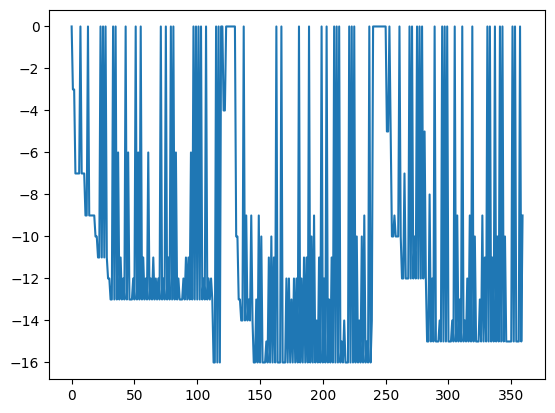

ITERAZIONE: 0 	 starting point: [0 0 0 0 0 0 0 0 0 0]
random_neighbour = [0 1 0 0 0 0 1 0 0 0] 	 valore = -5
random_neighbour = [1 1 0 0 0 0 1 1 0 0] 	 valore = -10
ITERAZIONE: 1 	 starting point: [1 1 0 0 0 0 1 1 0 0]
random_neighbour = [1 1 0 0 0 0 1 1 0 0] 	 valore = -10
T = 10.0	 eval_x = -10, 	 eval_xp = -10
soglia = 1.0 	 numero casuale = 0.11956341147114902
random_neighbour = [1 1 0 0 0 0 1 1 0 0] 	 valore = -10
T = 10.0	 eval_x = -10, 	 eval_xp = -10
soglia = 1.0 	 numero casuale = 0.9790074784296093
ITERAZIONE: 2 	 starting point: [1 1 0 0 0 0 1 1 0 0]
random_neighbour = [1 1 0 0 1 0 1 0 0 0] 	 valore = -9
T = 5.0	 eval_x = -10, 	 eval_xp = -9
soglia = 0.8187307530779818 	 numero casuale = 0.49734347210511376
random_neighbour = [1 1 0 0 0 1 1 0 0 0] 	 valore = -9
T = 5.0	 eval_x = -9, 	 eval_xp = -9
soglia = 1.0 	 numero casuale = 0.7376486431108329
ITERAZIONE: 3 	 starting point: [1 1 0 0 0 1 1 0 0 0]
random_neighbour = [0 1 0 0 0 1 0 0 0 0] 	 valore = -5
T = 2.5	 eval_x = -9

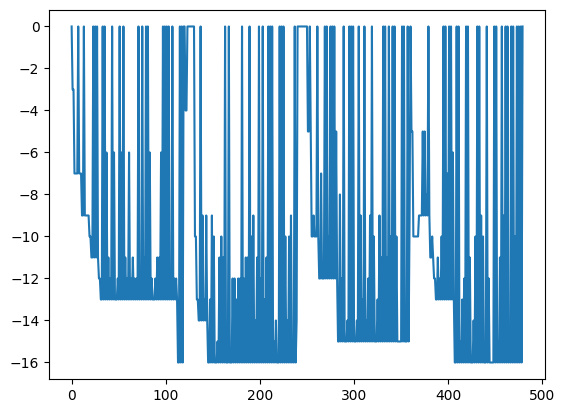

In [40]:
func = Knapsack_0_1()
T_list = [1, 5 ,10, 20]
iter_list = 30 
k_list = 2
alpha = 0.5

for T in T_list:

    x, eval_x = simulatedAnnealing(func, [0] * len(func._items), iter_list, T, k_list, alpha)
    print(f'SOLUZIONE FNALE = {x} \t VALORE = {eval_x}')
    func.trend()

### Final questions:
Iterated local search, variable neighbor search, and simulated annealing are very similar optimization algorithms.
Considering what was seen in this lab and the previous one, answer these questions:
 - Is there a "more efficient" algorithm?
 - How do the different parameters affect the search, and do they affect the choice of one algorithm to respect the others?